# Regressão 01 - tarefa 03 - transformações em X e Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips = tips[tips['tip_pct']<.5]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           8.79e-23
Time:                        13:47:39   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.446      0.000       0.590       1.529
sex[T.Female]     -0.0005      0.153     -0.003      0.997      -0.302       0.301
smoker[T.No]       0.2143      0.148      1.450      0.148      -0.077       0.505
time[T.Dinner]     0.0079      0.164      0.048      0.962      -0.315       0.331
net_bill           0.1058      0.009     11.483      0.000       0.088       0.124
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.889
Skew:                           0.682   Prob(JB):                     2.69e-13
Kurtosis:                       4.969   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           2.41e-25
Time:                        13:47:39   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

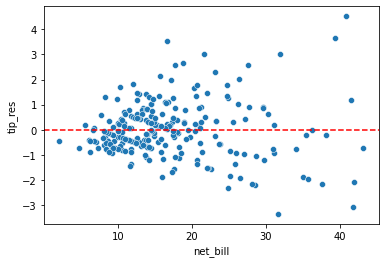

In [5]:
tips['tip_res'] = reg.resid
sns.scatterplot(data=tips, x='net_bill',y='tip_res')
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.13e-25
Time:                        13:47:40   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427     -4.651      0.000      -2.826      -1.144
np.log(net_bill)     1.8248      0.155     11.808      0.000       1.520       2.129
==============================================================================
Omnibus:                       46.523   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.909
Skew:                           0.881   Prob(JB):                     3.04e-25
Kurtosis:                       5.844   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

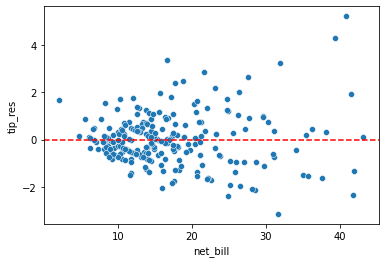

In [7]:
tips['tip_res'] = reg.resid
sns.scatterplot(data=tips, x='net_bill',y='tip_res')
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill, 2) + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     70.98
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           6.36e-25
Time:                        13:47:40   Log-Likelihood:                -364.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     239   BIC:                             745.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6297      0.358      1.757      0.080      -0.076       1.336
np.power(net_bill, 2)    -0.0016      0.001     -1.863      0.064      -0.003    8.93e-05
net_bill                  0.1716      0.037      4.618      0.000       0.098       0.245
==============================================================================
Omnibus:                       37.043   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.736
Skew:                           0.727   Prob(JB):                     6.56e-19
Kurtosis:                       5.488   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

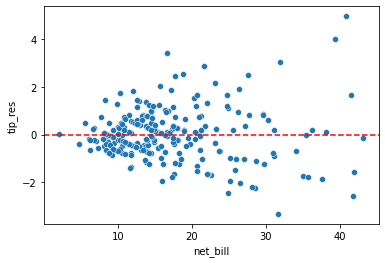

In [9]:
tips['tip_res'] = reg.resid
sns.scatterplot(data=tips, x='net_bill',y='tip_res')
plt.axhline(y=0, color='r', linestyle='--')

O melhor $R^2$ foi o do modelo com o polinômio da conta líquida.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     31.32
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           6.07e-21
Time:                        13:47:40   Log-Likelihood:                -90.268
No. Observations:                 242   AIC:                             190.5
Df Residuals:                     237   BIC:                             208.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4070      0.076      5.321      0.000       0.256       0.558
sex[T.Female]      0.0047      0.049      0.096      0.923      -0.092       0.101
smoker[T.No]       0.0668      0.047      1.408      0.160      -0.027       0.160
time[T.Dinner]     0.0031      0.053      0.058      0.954      -0.101       0.107
net_bill           0.0323      0.003     10.926      0.000       0.026       0.038
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.073
Skew:                          -0.298   Prob(JB):                        0.130
Kurtosis:                       3.221   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     123.8
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.82e-23
Time:                        13:47:40   Log-Likelihood:                -91.279
No. Observations:                 242   AIC:                             186.6
Df Residuals:                     240   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4604      0.053      8.617      0.000       0.355       0.566
net_bill       0.0318      0.003     11.128      0.000       0.026       0.037
==============================================================================
Omnibus:                        5.775   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.480
Skew:                          -0.354   Prob(JB):                       0.0646
Kurtosis:                       3.204   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

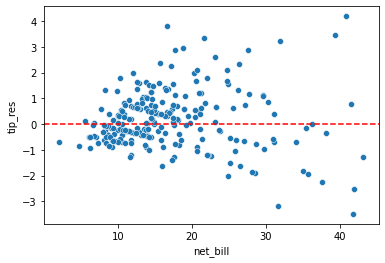

In [12]:
tips['tip_res'] = tips['tip'] - np.exp(reg.fittedvalues)
sns.scatterplot(data=tips, x='net_bill',y='tip_res')
plt.axhline(y=0, color='r', linestyle='--')

In [13]:
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     157.4
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           4.20e-28
Time:                        13:47:40   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)     0.5973      0.048     12.547      0.000       0.504       0.691
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2) + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     75.99
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           2.86e-26
Time:                        13:47:40   Log-Likelihood:                -82.063
No. Observations:                 242   AIC:                             170.1
Df Residuals:                     239   BIC:                             180.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0303      0.112      0.271      0.786      -0.189       0.250
np.power(net_bill, 2)    -0.0011      0.000     -4.349      0.000      -0.002      -0.001
net_bill                  0.0807      0.012      6.976      0.000       0.058       0.103
==============================================================================
Omnibus:                        9.395   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.950
Skew:                          -0.390   Prob(JB):                      0.00691
Kurtosis:                       3.614   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo $log(tip)$ em função de $log(net\_bill)$ tem o melhor $R^2$

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg = sm.OLS(y, X).fit()

pred_y = pd.Series(np.exp(reg.fittedvalues))
real_y = tips['tip']
real_y.corr(pred_y) ** 2

0.25093098763938754

O melhor ajuste acabou sendo o do item 1: $tip \sim net\_bill^2 + net\_bill$

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

##### Parte 1

In [16]:
renda = pd.read_csv('previsao_de_renda.csv').dropna().drop_duplicates().drop('Unnamed: 0', axis=1)
renda

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [17]:
reg_renda = smf.ols('renda ~ tempo_emprego', data=renda).fit()

##### Parte 2

/home/nerdman/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


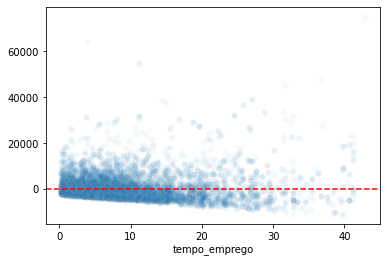

In [18]:

resid_renda = renda['renda'] - reg_renda.fittedvalues
sns.scatterplot(renda['tempo_emprego'], resid_renda, alpha=.05)
plt.axhline(0, color='r', linestyle='--')

/home/nerdman/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


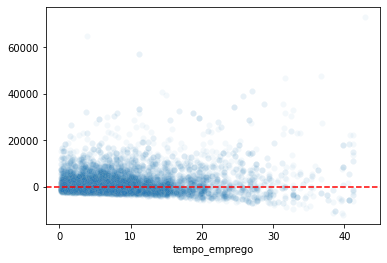

In [19]:
reg_log_renda = smf.ols('np.log(renda) ~ tempo_emprego', data=renda).fit()

resid_log_renda = renda['renda'] - np.exp(reg_log_renda.fittedvalues)
sns.scatterplot(renda['tempo_emprego'], resid_log_renda, alpha=.05)
plt.axhline(0, color='r', linestyle='--')

In [20]:
reg_renda.rsquared

0.1554213960704408

In [21]:
pred_y = np.exp(reg_log_renda.fittedvalues)
pred_y.corr(renda['renda'])**2

0.16828855206733567

##### Parte 3

In [22]:
reg_renda_c = smf.ols('np.log(renda) ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + mau', data=renda).fit()
reg_renda_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:47:41   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12440   BIC:                         2.665e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2007      0.272     26.484      0.000       6.668       7.734
sexo[T.M]                            0.4815      0.014     33.681      0.000       0.453       0.510
posse_de_veiculo[T.True]            -0.0014      0.014     -0.104      0.917      -0.028       0.026
posse_de_imovel[T.True]              0.0847      0.014      6.260      0.000       0.058       0.111
tipo_renda[T.Bolsista]              -0.0499      0.350     -0.143      0.887      -0.735       0.636
tipo_renda[T.Empresário]             0.1787      0.015     12.217      0.000       0.150       0.207
tipo_renda[T.Pensionista]            0.4099      0.237      1.732      0.083      -0.054       0.874
tipo_renda[T.Servidor público]       0.0949      0.021      4.482      0.000       0.053       0.136
educacao[T.Pós graduação]            0.5496      0.175      3.133      0.002       0.206       0.893
educacao[T.Secundário]               0.0166      0.071      0.233      0.816      -0.123       0.156
educacao[T.Superior completo]        0.1134      0.071      1.590      0.112      -0.026       0.253
educacao[T.Superior incompleto]     -0.0090      0.076     -0.117      0.907      -0.159       0.141
estado_civil[T.Separado]            -0.0395      0.131     -0.302      0.763      -0.296       0.217
estado_civil[T.Solteiro]             0.0213      0.129      0.166      0.868      -0.231       0.273
estado_civil[T.União]               -0.0256      0.023     -1.098      0.272      -0.071       0.020
estado_civil[T.Viúvo]               -0.0377      0.134     -0.280      0.779      -0.301       0.226
tipo_residencia[T.Casa]              0.0146      0.053      0.274      0.784      -0.090       0.119
tipo_residencia[T.Com os pais]      -0.0578      0.060     -0.967      0.334      -0.175       0.059
tipo_residencia[T.Comunitário]       0.0571      0.103      0.555      0.579      -0.145       0.259
tipo_residencia[T.Estúdio]          -0.1093      0.089     -1.231      0.218      -0.283       0.065
tipo_residencia[T.Governamental]    -0.0567      0.064     -0.880      0.379      -0.183       0.070
mau[T.True]                         -0.0323      0.042     -0.778      0.437      -0.114       0.049
tempo_emprego                        0.0482      0.001     48.349      0.000       0.046       0.050
qtd_filhos                           0.0047      0.128      0.037      0.971      -0.247       0.256
idade                                0.0052      0.001      6.628      0.000       0.004       0.007
qt_pessoas_residencia                0.0114      0.128      0.089      0.929      -0.239       0.262
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   2.

##### Parte 4

In [23]:
reg_renda_d = smf.ols('np.log(renda) ~ tempo_emprego + sexo + posse_de_imovel + tipo_renda + educacao + idade + qt_pessoas_residencia', data=renda).fit()
reg_renda_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     303.7
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:47:42   Log-Likelihood:                -13213.
No. Observations:               12466   AIC:                         2.645e+04
Df Residuals:                   12452   BIC:                         2.656e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.1833      0.079     91.184      0.000       7.029       7.338
sexo[T.M]                           0.4827      0.013     36.167      0.000       0.457       0.509
posse_de_imovel[T.True]             0.0948      0.013      7.168      0.000       0.069       0.121
tipo_renda[T.Bolsista]             -0.0445      0.350     -0.127      0.899      -0.730       0.641
tipo_renda[T.Empresário]            0.1786      0.015     12.244      0.000       0.150       0.207
tipo_renda[T.Pensionista]           0.3960      0.233      1.698      0.090      -0.061       0.853
tipo_renda[T.Servidor público]      0.0924      0.021      4.376      0.000       0.051       0.134
educacao[T.Pós graduação]           0.5705      0.175      3.257      0.001       0.227       0.914
educacao[T.Secundário]              0.0258      0.071      0.364      0.716      -0.113       0.165
educacao[T.Superior completo]       0.1230      0.071      1.730      0.084      -0.016       0.262
educacao[T.Superior incompleto]     0.0007      0.076      0.009      0.993      -0.149       0.150
tempo_emprego                       0.0483      0.001     48.631      0.000       0.046       0.050
idade                               0.0052      0.001      6.917      0.000       0.004       0.007
qt_pessoas_residencia               0.0144      0.007      2.107      0.035       0.001       0.028
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.989
Skew:                          -0.013   Prob(JB):                        0.610
Kurtosis:                       3.036   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Parte 5

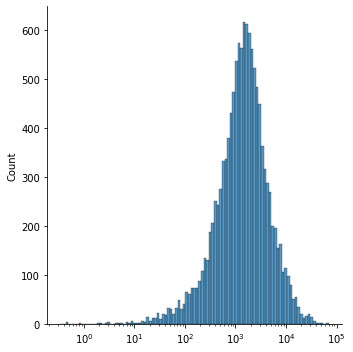

In [34]:
resid_renda_d = renda['renda'] - np.exp(reg_renda_d.fittedvalues)
sns.displot(np.abs(resid_renda_d), log_scale=True)
#plt.axhline(0, color='r', linestyle='--')

In [25]:
pred_y = np.exp(reg_renda_d.fittedvalues)
pred_y.corr(renda['renda'])**2

0.24252902332149276